<a href="https://colab.research.google.com/github/IvanCampos11/Build-Week-Project/blob/master/Build_Week_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pylab import rcParams

In [88]:
android = pd.read_csv('https://raw.githubusercontent.com/IvanCampos11/Build-Week-Project/master/googleplaystore.csv')
apple = pd.read_csv('https://github.com/IvanCampos11/Build-Week-Project/raw/master/Applestore.csv')

In [89]:
apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [90]:
apple = apple.drop(['id','currency','rating_count_ver','user_rating_ver','ipadSc_urls.num','vpp_lic','ver','sup_devices.num'], axis=1)

In [91]:
apple.head()

,Unnamed: 0,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,1,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,2,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,5,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [92]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [93]:
android = android.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1)

In [94]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [95]:
crosstab = pd.crosstab(android['Category'], android['Rating'])

In [96]:
android.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [97]:
android = android.replace(np.nan, 0)

In [98]:
android.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [99]:
android.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [100]:
android['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [101]:
android['Size'] = android['Size'].str.replace('M', '')
android['Size'] = android['Size'].str.replace('k', '')
indexNames = android['Size'][ android['Size'] == '1,000+' ].index
android['Size'].drop(indexNames , inplace=True)
# android['Size'] = android['Size'][android.Size != '1,000+']

In [102]:
android['Size'].head()

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size, dtype: object

In [103]:
android['Size'] = android['Size'].str.replace('Varies with device', '0')

In [104]:
android['Size'] = android['Size'].astype(float)

In [105]:
android['Size'] = android['Size'].dropna()

In [106]:
android.Size.isnull().sum()

1

In [107]:
android['Installs'] = android['Installs'].str.replace('+', '')
android['Installs'] = android['Installs'].str.replace(',', '')
android['Installs'] = android['Installs'].str.replace('Free', '0')
android['Installs'] = android['Installs'].astype(int)

In [108]:
android.head().dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [109]:
apple.head()

,Unnamed: 0,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,1,PAC-MAN Premium,100788224,3.99,21292,4.0,4+,Games,10
1,2,Evernote - stay organized,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4+,Weather,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12+,Shopping,9
4,5,Bible,92774400,0.00,985920,4.5,4+,Reference,45


In [110]:
apple['cont_rating'] = apple['cont_rating'].str.replace('+', '')

In [111]:
apple.head()

,Unnamed: 0,track_name,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,lang.num
0,1,PAC-MAN Premium,100788224,3.99,21292,4.0,4,Games,10
1,2,Evernote - stay organized,158578688,0.00,161065,4.0,4,Productivity,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,4,Weather,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,12,Shopping,9
4,5,Bible,92774400,0.00,985920,4.5,4,Reference,45


In [112]:
apple['cont_rating'] = apple['cont_rating'].astype(int)

In [113]:
apple.dtypes

Unnamed: 0            int64
track_name           object
size_bytes            int64
price               float64
rating_count_tot      int64
user_rating         float64
cont_rating           int64
prime_genre          object
lang.num              int64
dtype: object

In [114]:
apple['size_bytes'] = apple['size_bytes'].astype(float)

In [148]:
fig = go.Figure(data=go.Histogram(x=apple['prime_genre'], y=apple['rating_count_tot']))
fig.update_layout(title="Unique quantity of apps(by category): Apple",xaxis_title="Category",yaxis_title="Quantity of unique apps",font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [149]:
# user_rating_ten = apple['user_rating'].head(10)
indexNames = apple['prime_genre'][ apple['prime_genre'] == 'Games' ].index
apple['prime_genre'].drop(indexNames , inplace=True)

In [150]:
fig = go.Figure(data=go.Histogram(x=apple['prime_genre'], y=apple['rating_count_tot']))
fig.update_layout(title="Unique quantity of apps(by category): Apple",xaxis_title="Category",yaxis_title="Quantity of unique apps",font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [76]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity


In [118]:
indexNames = android['Category'][ android['Category'] == 'GAME' ].index
android['Category'].drop(indexNames , inplace=True)

In [132]:
indexNames = android['Category'][ android['Category'] == '1.9' ].index
android['Category'].drop(indexNames , inplace=True)

In [146]:
fig = go.Figure(data=go.Histogram(x=android['Category']))
fig.update_layout(title="Unique quantity of apps(by category): GooglePlayStore",xaxis_title="Category",yaxis_title="Quantity of unique apps",font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))
fig.show()

In [209]:
px.scatter(android, x=android['App'].head(10), y=android['Rating'].head(10),size=android['Rating'].head(10))

In [218]:
e = android.Rating.sort_values()

Text(0.5, 1.0, 'Distribution of Rating')

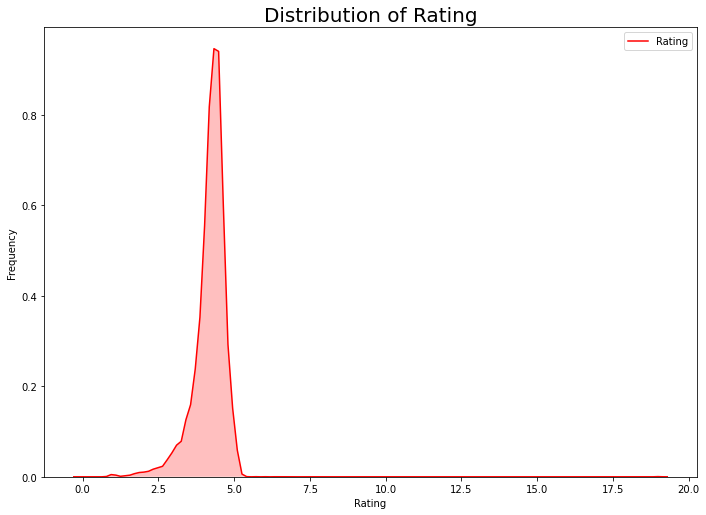

In [243]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(android.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=android);
plt.title('Rating VS Reveiws',size = 20)

ValueError: ignored

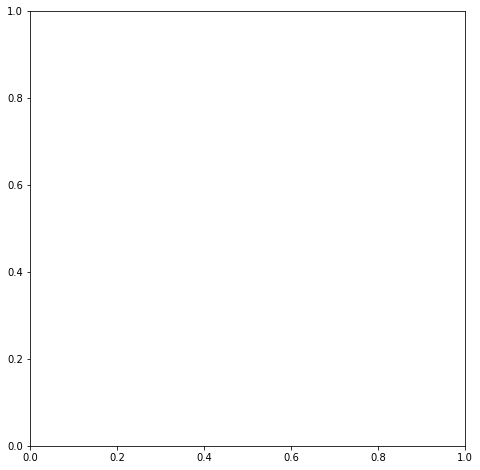

In [232]:
labels =android['Type'].value_counts(sort = True).index
sizes = android['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()